<a href="https://colab.research.google.com/github/MarcoMulas99/ISD/blob/main/MNIST_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Dataset**

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', cache=True)

[6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


<BarContainer object of 10 artists>

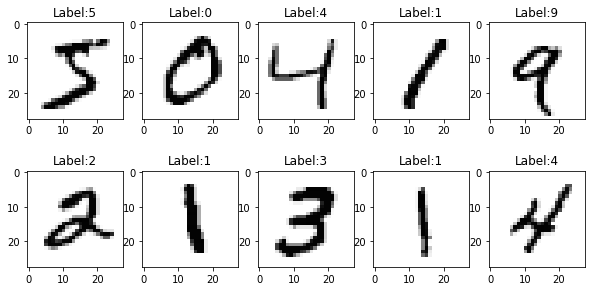

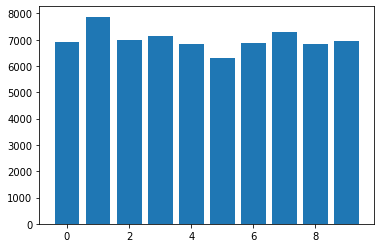

In [38]:
import numpy as np
from matplotlib import pyplot as plt

x = mnist.data / 255
y = np.array(mnist.target, dtype = int)

#print(x.shape, y.shape)
#print(y[0:10])
plt.figure(figsize=(10,5))

for i in range(10):
  plt.subplot(2,5,i+1)
  img = x[i,:].reshape(28,28)
  plt.imshow(img, cmap='Greys')
  plt.title("Label:"+str(y[i]))

# count how many elements i hava in each class
labels = np.unique(y)
n_classes = labels.size

n_samples_per_class = np.zeros(shape=(n_classes),dtype=int)

for i in range(10):
  n_samples_per_class[i] = sum(y==i)
print(n_samples_per_class)

plt.figure()
plt.bar(labels,n_samples_per_class)